In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

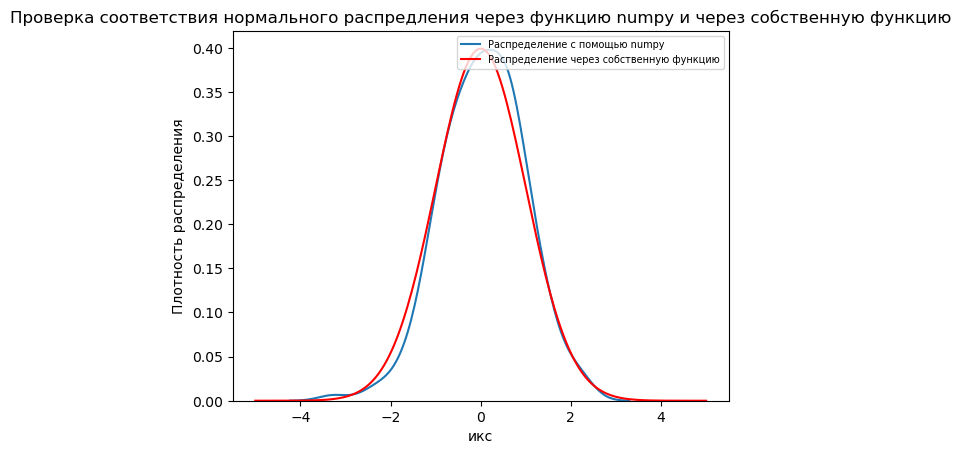

In [31]:
x = np.linspace(-5,5,200)

#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (1 / math.sqrt(2 * np.pi) * sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

pdf = normal_dist(x, 0, 1)
a = np.random.normal(0, 1, 200)
plt.title('Проверка cоответствия нормального распредления через функцию numpy и через собственную функцию')
sns.kdeplot(a, fill = False, label='Распределение с помощью numpy')
plt.plot(x, pdf , color = 'red', label='Распределение через собственную функцию')

plt.legend(loc = 'upper right', prop = {'size': 7})
plt.ylabel('Плотность распределения')
plt.xlabel('икс')
plt.show()

In [32]:
def generate_random_matrix(size, random_type):
    """
    Создание выборки определенного размера определенного вида распределения
    """
    # Распределение Гаусса
    if random_type == 'gauss':
        mu, sigma = 0, 1 
        matrix = np.random.normal(mu, sigma, (size, size))
    # Распределение Коши
    if random_type == 'cauchy':
        matrix = np.random.standard_cauchy(size = (size,size))
    # Равномерное распредление
    if random_type == 'uniform':
        matrix = np.random.uniform(0,1, size = (size,size))
    return matrix

In [33]:
normal_raspr = generate_random_matrix(1024, 'gauss')
print(normal_raspr)

[[ 0.75206813  0.21063443  0.13973622 ... -0.76613594 -0.4594602
   1.59409003]
 [ 1.86086628  0.04992714 -0.66487089 ... -0.40698382 -0.056075
   1.81075628]
 [ 0.86932095  0.59078844 -0.54529569 ...  1.10714904  0.0189156
   0.49646552]
 ...
 [ 0.40405297 -1.08590352  0.8431499  ... -1.85974577  0.7746974
   0.60221391]
 [ 1.12705757 -0.4168574   0.22809064 ... -0.53840817  0.41909572
  -1.35070137]
 [ 0.13707279 -0.29371471 -0.53494685 ...  1.39843941 -0.96366471
   1.79012744]]


In [34]:
cauchy_raspr = generate_random_matrix(1024, 'cauchy')
print(cauchy_raspr)

[[ -1.4001786    0.1749194    0.57793982 ...  -1.3071095    0.85681389
    1.8945329 ]
 [  0.79022372  -1.63026797   2.16767651 ...   0.79837842   1.08230579
   -1.17378636]
 [ -0.89392853  -1.28622171  -2.15622306 ...   0.66939155   0.40052769
    0.1925033 ]
 ...
 [ -3.88376712  -2.48513002  -0.30333703 ...  -0.78326316  -0.18958182
    1.82768084]
 [ -1.4916178   -0.41791224  -1.32018036 ...   0.45845163  -0.10734803
   -0.2454808 ]
 [ -0.10518562   1.05436735  -5.29409612 ...  -2.34863936 -15.92723789
   -0.74550554]]


In [35]:
uniform_raspr = generate_random_matrix(1024, 'uniform')
print(uniform_raspr)

[[0.86842357 0.47886017 0.61614334 ... 0.73090942 0.66272972 0.76791686]
 [0.17716659 0.05265971 0.57486059 ... 0.63179029 0.10380353 0.67013667]
 [0.27277049 0.69139355 0.58400391 ... 0.19449453 0.37999875 0.35219401]
 ...
 [0.56578941 0.54463024 0.043001   ... 0.0864067  0.26242771 0.89143692]
 [0.52972991 0.63389237 0.67894818 ... 0.89303199 0.41093281 0.75066521]
 [0.54023201 0.73616586 0.39722581 ... 0.97086598 0.24086779 0.32983183]]


# Проверка гипотезы о принадлежности к предполагаемому законупо критерию Хи-квадрат

In [36]:
def probability(border1, border2, random_type):
    """
    Расчет вероятности нахождения элемента в интервале в зависимости от распределения
    """
    if random_type == 'gauss':
        return 0.5*(1 + math.erf(border2/math.sqrt(2))) - 0.5*(1 + math.erf(border1/math.sqrt(2)))
    if random_type == 'cauchy':
        return ((1 / np.pi) * math.atan(border2) + 0.5) - ((1 / np.pi) * math.atan(border1) + 0.5)
    if random_type == 'uniform':
        if border2 > 0 and border2 < 1 and border1 > 0 and border1 < 1:
            return border2 - border1
        else:
            return 0

def k_prob(x):
    """
    Расчет количества интервалов для выборки
    """
    return 1.72 * (x.size)**(1/3)

In [37]:
def create_borders(k, borders_size):
    """
    Расчет значений границ определенных интервалов для выборки
    """
    borders=[-borders_size // 2]
    current = - borders_size // 2
    step = borders_size / k
    for i in range(k - 1):
        current += step
        borders.append(current)
        borders.append(current)
    borders.append(borders_size // 2)
    return borders


In [38]:
def k_j(array, borders, k_intervals):
    """
    Расчет количсетва элементов выборки в заданных интервалах
    """
    array = array.reshape(-1)
    k_j = []
    for i in range(0, k_intervals * 2, 2):
        data = [p for p in array if p >= borders[i] and p < borders[i + 1]]
        k_j.append(len(data))
    return k_j
        

In [39]:
def hi_kvadrat(raspr, random_type):
    """
    Расчет статистики Хи-квадрат для выборки
    """
    k = int(k_prob(raspr))
    a = create_borders(k, 5)
    b = k_j(raspr, a, k)
    # Расчет вероятности нахождения элемента в интервале в зависимости от распределения
    if random_type == 'gauss':
        prob = []
        for i in range(0, k * 2, 2):
            prob.append(probability(a[i], a[i + 1], 'gauss'))
    elif random_type == 'cauchy':
        prob = []
        for i in range(0, k * 2, 2):
            prob.append(probability(a[i], a[i + 1], 'cauchy'))
    elif random_type == 'uniform':
        prob = []
        for i in range(0, k * 2, 2):
            prob.append(probability(a[i], a[i + 1], 'uniform'))
    raspr_length = raspr.size
    hi_kvadrat = 0
    for i in range(0, k):
        if prob[i] == 0:
            hi_kvadrat += 0
        else:
            hi_kvadrat += (b[i] - raspr_length * prob[i])**2 / (raspr_length * prob[i])
    return hi_kvadrat

hi_normal = [hi_kvadrat(normal_raspr, random_type='gauss'), hi_kvadrat(normal_raspr, random_type='cauchy'), hi_kvadrat(normal_raspr, random_type='uniform')]
print('Статистика Хи квадрат для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для нормального закона', np.round(hi_normal, 2))
print('\n')
hi_cauchy = [hi_kvadrat(cauchy_raspr, random_type='gauss'), hi_kvadrat(cauchy_raspr, random_type='cauchy'), hi_kvadrat(cauchy_raspr, random_type='uniform')]
print('Статистика Хи квадрат для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для закона распределения Коши', np.round(hi_cauchy, 2))
print('\n')
hi_uniform = [hi_kvadrat(uniform_raspr, random_type='gauss'), hi_kvadrat(uniform_raspr, random_type='cauchy'), hi_kvadrat(uniform_raspr, random_type='uniform')]
print('Статистика Хи квадрат для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для равномерного закона распределения', np.round(hi_uniform))

Статистика Хи квадрат для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для нормального закона [1.7688000e+02 1.2039417e+05 4.4715816e+05]


Статистика Хи квадрат для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для закона распределения Коши [1.3249077e+05 1.7037000e+02 5.7825113e+05]


Статистика Хи квадрат для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для равномерного закона распределения [2.031626e+06 3.033653e+06 3.300000e+01]


In [40]:
# Caclculates Hi^2 quantile by Approximation of Cornish and Fisher
def cornish_fisher(quant, n):
    """
    Расчет квантилей распределения Хи-квадрат с помощью аппроксимации Корниша-Фишера
    """
    if quant >= 0.5 and quant < 1:
        d = 2.0637 * (np.log(1 / (1 - quant) - 0.16)) ** 0.4274 - 1.5774
    else:
        d = -2.0637 * (np.log(1 / quant - 0.16)) ** 0.4274 + 1.5774
    A = d * np.sqrt(2)
    B = 2 / 3 * (d ** 2-1)
    C = d * (d ** 2 - 7) / 9 / np.sqrt(2)
    D = (6 * d ** 4 + 14 * d ** 2 - 32) / 405
    E = d * (9 * d ** 4 + 256 * d ** 2 - 433) / 4860 / np.sqrt(2)
    return n + A * np.sqrt(n) + B + C / np.sqrt(n) + D / n + E / n / np.sqrt(n)

print(cornish_fisher(0.99, k_prob(normal_raspr) - 1))
print(cornish_fisher(0.95, k_prob(normal_raspr) - 1))

221.3290180092794
207.01031394267304


Если вычисленная статистика Хи-квадрат меньше, чем рассчитанная по аппроксимации Корниша-Фишера квантиль распределения Хи-квадрат, то гипотеза о принадлежности выборки к предполагаемому закону подтверждается.

# Проверка гипотезы о принадлежности к предполагаемому закону по критерию Колмогорова

In [41]:
def Kolmogorov_statistics(raspr, random_type):
    """
    Расчет статистики колмогорова для выборки
    """
    k = int(k_prob(raspr))
    a = create_borders(k, 5)
    b = k_j(raspr, a, k)
    if random_type == 'gauss':
        prob = []
        for i in range(0, k * 2, 2):
            prob.append(probability(a[i], a[i + 1], 'gauss'))
    elif random_type == 'cauchy':
        prob = []
        for i in range(0, k * 2, 2):
            prob.append(probability(a[i], a[i + 1], 'cauchy'))
    elif random_type == 'uniform':
        prob = []
        for i in range(0, k * 2, 2):
            prob.append(probability(a[i], a[i + 1], 'uniform'))
    stat = 0
    raspr_length = raspr.size
    for i in range(0, k):
        temp_stat = np.max([b[i] / raspr_length - prob[i], prob[i] - (b[i] - 1) / raspr_length])
        stat = np.max([stat, temp_stat])
    return stat
kolm_normal = [Kolmogorov_statistics(normal_raspr, random_type='gauss'), Kolmogorov_statistics(normal_raspr, random_type='cauchy'), Kolmogorov_statistics(normal_raspr, random_type='uniform')]
print('Статистика Колмогорова для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для нормального закона', np.round(kolm_normal, 5))
print('\n')
kolm_cauchy = [Kolmogorov_statistics(cauchy_raspr, random_type='gauss'), Kolmogorov_statistics(cauchy_raspr, random_type='cauchy'), Kolmogorov_statistics(cauchy_raspr, random_type='uniform')]
print('Статистика Колмогорова для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для закона распределения Коши', np.round(kolm_cauchy, 5))
print('\n')
kolm_uniform = [Kolmogorov_statistics(uniform_raspr, random_type='gauss'), Kolmogorov_statistics(uniform_raspr, random_type='cauchy'), Kolmogorov_statistics(uniform_raspr, random_type='uniform')]
print('Статистика Колмогорова для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для равномерного закона распределения', np.round(kolm_uniform, 5))

Статистика Колмогорова для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для нормального закона [0.00032 0.00309 0.02162]


Статистика Колмогорова для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для закона распределения Коши [0.003   0.00018 0.02404]


Статистика Колмогорова для каждой из выборок с разным распределением(Нормальное, Коши, Равномерное) для равномерного закона распределения [0.02218 0.02461 0.01732]


In [42]:
def Kolmogorov_quantile(quantile):
    """
    Расчет квантили  распредления Колмогорова разного уровня значимости
    """
    return math.sqrt(-0.5 * np.log((1 - quantile) / 2))

print(Kolmogorov_quantile(0.99) / math.sqrt(normal_raspr.size))
print(Kolmogorov_quantile(0.95) / math.sqrt(normal_raspr.size))

0.0015894762018737589
0.0013262710114654486


Если вычисленная статистика Колмогорова меньше, чем квантиль распределения Колмогорова, то гипотеза о принадлежности выборки к предполагаемому закону подтверждается

# Проверка гипотезы о независимости 1-й и 2-й половин сл.поля для каждой из 3-х выборок

In [43]:
def first_moment(array):
    """
    Расчет первого момента для выборки
    """
    return (2 / len(array)) * np.sum(array[0 : len(array) // 2])

In [44]:
def second_moment(array):
    """
    Расчет второго момента для выборки
    """
    return (2 / len(array)) * np.sum(array[len(array) // 2 : len(array)])

In [45]:
def reshape_and_sort(array):
    array = array.reshape(-1)
    return np.sort(array)

In [46]:
def determine_r_for_student(array):
    """
    Расчет корреляционного коэффициента r для выборки
    """
    array = reshape_and_sort(array)
    frst = first_moment(array)
    scd = second_moment(array)
    chislitel = np.sum((array[0 : len(array) // 2] - frst) * (array[len(array) // 2 : len(array)] - scd))
    znamenatel = math.sqrt(np.sum((array[0 : len(array) // 2] - frst) ** 2) * np.sum((array[len(array) // 2 : len(array)] - scd) ** 2))
    return chislitel / znamenatel
    

In [47]:
def student_stat(array):
    """
    Расчет статистики Стюдента для выборки
    """
    r = determine_r_for_student(array)
    return (r / math.sqrt(1 - r ** 2)) * math.sqrt(len(array) - 2)

In [48]:
print('Student_independed_normal:', np.round(student_stat(normal_raspr), 2))

Student_independed_normal: 53.23


In [49]:
print('Student_independed_cauchy:', np.round(student_stat(cauchy_raspr), 5))

Student_independed_cauchy: 0.00116


In [50]:
print('Student_independed_uniform:', np.round(student_stat(uniform_raspr), 2))

Student_independed_uniform: 26656.74


student_kvantil = 2.28
Если статистика Стьюдента больше чем student_kvantil, то 1-я и 2-я половины выборки зависимы.